# PDA Data Science Project

## Predicting Employee Turnover with Machine Learning and Generating Visualizations

## 1. Introduction

### Scenario 

A small company is facing challenges with high employee turnover. They have provided us with one year of employee data, and our task is to assist them in analyzing this data to formulate effective strategies for retaining employees. Through our analysis, we aim to recommend targeted strategies that will help the company improve employee retention. 


### Data and Methodology 

In this project, we are analyzing a data set that includes records for 1,470 employees for an entire year, predicting employee turnover for the upcoming year. It includes various employee related attributes such as age, department, education, job satisfaction etc. This data set gives a rich source of information, it helps us to uncover the trends and patterns to find the turnover. We use advanced machine learning algorithms, using python programming language, using popular libraries such as Scikit-Learn, we aimed to develop predictive models by training them on historical data. We are using data visualization to enhance our findings to understand non-technical people, we utilize Matplotlib, a versatile and widely used plotting library in Python, to create insightful visualizations. 


### Goals and objective 

The primary goal of this project is to provide company with a predictive tool that can proactively identify potential employee turnover risks. By understanding the underlying factors leading to turnover, organizations can implement targeted strategies to enhance employee satisfaction and retention. 


### Expected outcome 

Through this project, we anticipate generating actionable insights that empower organizations to make informed decisions about their workforce. As per our project timeline, we will be producing our live project on 31 January 2024. 

## 2. Data collection

The data collection phase is a crucial step in our project. In this section we outline the methodologies, tools and procedures employed to gather relevant data for our analysis.  
 
 
### Evaluating Data Sources 

In order to find a suitable dataset, we also explored other options such as Kaggle, where we found several open datasets relevant to our aim for predicting employee turnover. For example, there was a dataset from Tejashvi containing fake employee data. The link to the dataset can be found here.  
 
Unfortunately, there was not enough data for us to effectively predict the employee turnover by using this dataset therefore, we explored other options which led us to find our chosen data source below.  


### Chosen Data Source 

Our primary data source for this project was from 'Data Science 4 Business' which contains valuable information related to employee turnover, job satisfaction and various other factors. Please find the link to the website here.  
 
 
### Methods 

 * Identify and select the specific dataset on datascience 4 business website "Employee Future Prediction" 
 * Carefully review the data license and usage terms to ensure compliance.  
 * Download the dataset to local storage and project environment (GitHub).  
 * Verify the integrity of the download data files to ensure they are not corrupted.  
 * Maintain a backup of the downloaded dataset to prevent the risk of data loss.  


## 3. Data Description

### Libraries

In [87]:
# installing libraries
# pip install matplotlib

In [88]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset file

In [89]:
df = pd.read_csv('turnover.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

,age,turnover,travels,department,distance_home,education,career,employees,environment_satisfaction,sex,...,satisfaction_colleagues,fortnight_hours,shares_level,experience_years,num_formations_last_year,reconciliation,years_company,years_in_position,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,1,Medium,3.0,...,Low,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,High School,Life Sciences,1,High,2.0,...,Very_High,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High School,Other,1,Very_High,2.0,...,Medium,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,1,Very_High,3.0,...,High,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,1,Low,3.0,...,Very_High,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,High,4.0,...,High,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High School,Medical,1,Very_High,2.0,...,Low,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Medium,4.0,...,Medium,80,1,6,0,NaN,6,NaN,0,3


## 4. Exploratory Data Analysis (EDA)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1470 non-null   int64  
 1   turnover                    1470 non-null   object 
 2   travels                     1470 non-null   object 
 3   department                  1470 non-null   object 
 4   distance_home               1470 non-null   int64  
 5   education                   1369 non-null   object 
 6   career                      1470 non-null   object 
 7   employees                   1470 non-null   int64  
 8   environment_satisfaction    1470 non-null   object 
 9   sex                         1271 non-null   float64
 10  implication                 1452 non-null   object 
 11  work_level                  1470 non-null   int64  
 12  position                    1470 non-null   object 
 13  job_satisfaction            1394 

### Null Values Analysis

In [91]:
df.isna().sum().sort_values(ascending = False)

years_in_position             1238
reconciliation                1011
sex                            199
education                      101
job_satisfaction                76
implication                     18
age                              0
shares_level                     0
evaluation                       0
satisfaction_colleagues          0
fortnight_hours                  0
experience_years                 0
overtime                         0
num_formations_last_year         0
years_company                    0
years_since_last_promotion       0
salary_increase_perc             0
month_salary                     0
legal_age                        0
num_previous_companies           0
turnover                         0
marital_status                   0
position                         0
work_level                       0
environment_satisfaction         0
employees                        0
career                           0
distance_home                    0
department          

Conclusion:
* years_in_position and reconciliation have too many null values, we need to remove them
* sex, education, job_satisfaction and implication have some null values, so we need to either remove them or input most common values after EDA.

In [92]:
df.drop(columns = ['years_in_position','reconciliation'], inplace = True)
df

,age,turnover,travels,department,distance_home,education,career,employees,environment_satisfaction,sex,...,salary_increase_perc,evaluation,satisfaction_colleagues,fortnight_hours,shares_level,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,1,Medium,3.0,...,11,High,Low,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,High School,Life Sciences,1,High,2.0,...,23,Very_High,Very_High,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High School,Other,1,Very_High,2.0,...,15,High,Medium,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,1,Very_High,3.0,...,11,High,High,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,1,Low,3.0,...,12,High,Very_High,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,High,4.0,...,17,High,High,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High School,Medical,1,Very_High,2.0,...,15,High,Low,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Medium,4.0,...,20,Very_High,Medium,80,1,6,0,6,0,3


### EDA Categoric Variables

In [93]:
def categoric_eda_graphs(cat):

    # rows needed
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    # Graph design
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    # flat graph
    ax = ax.flat

    # adding graphs for each variable
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

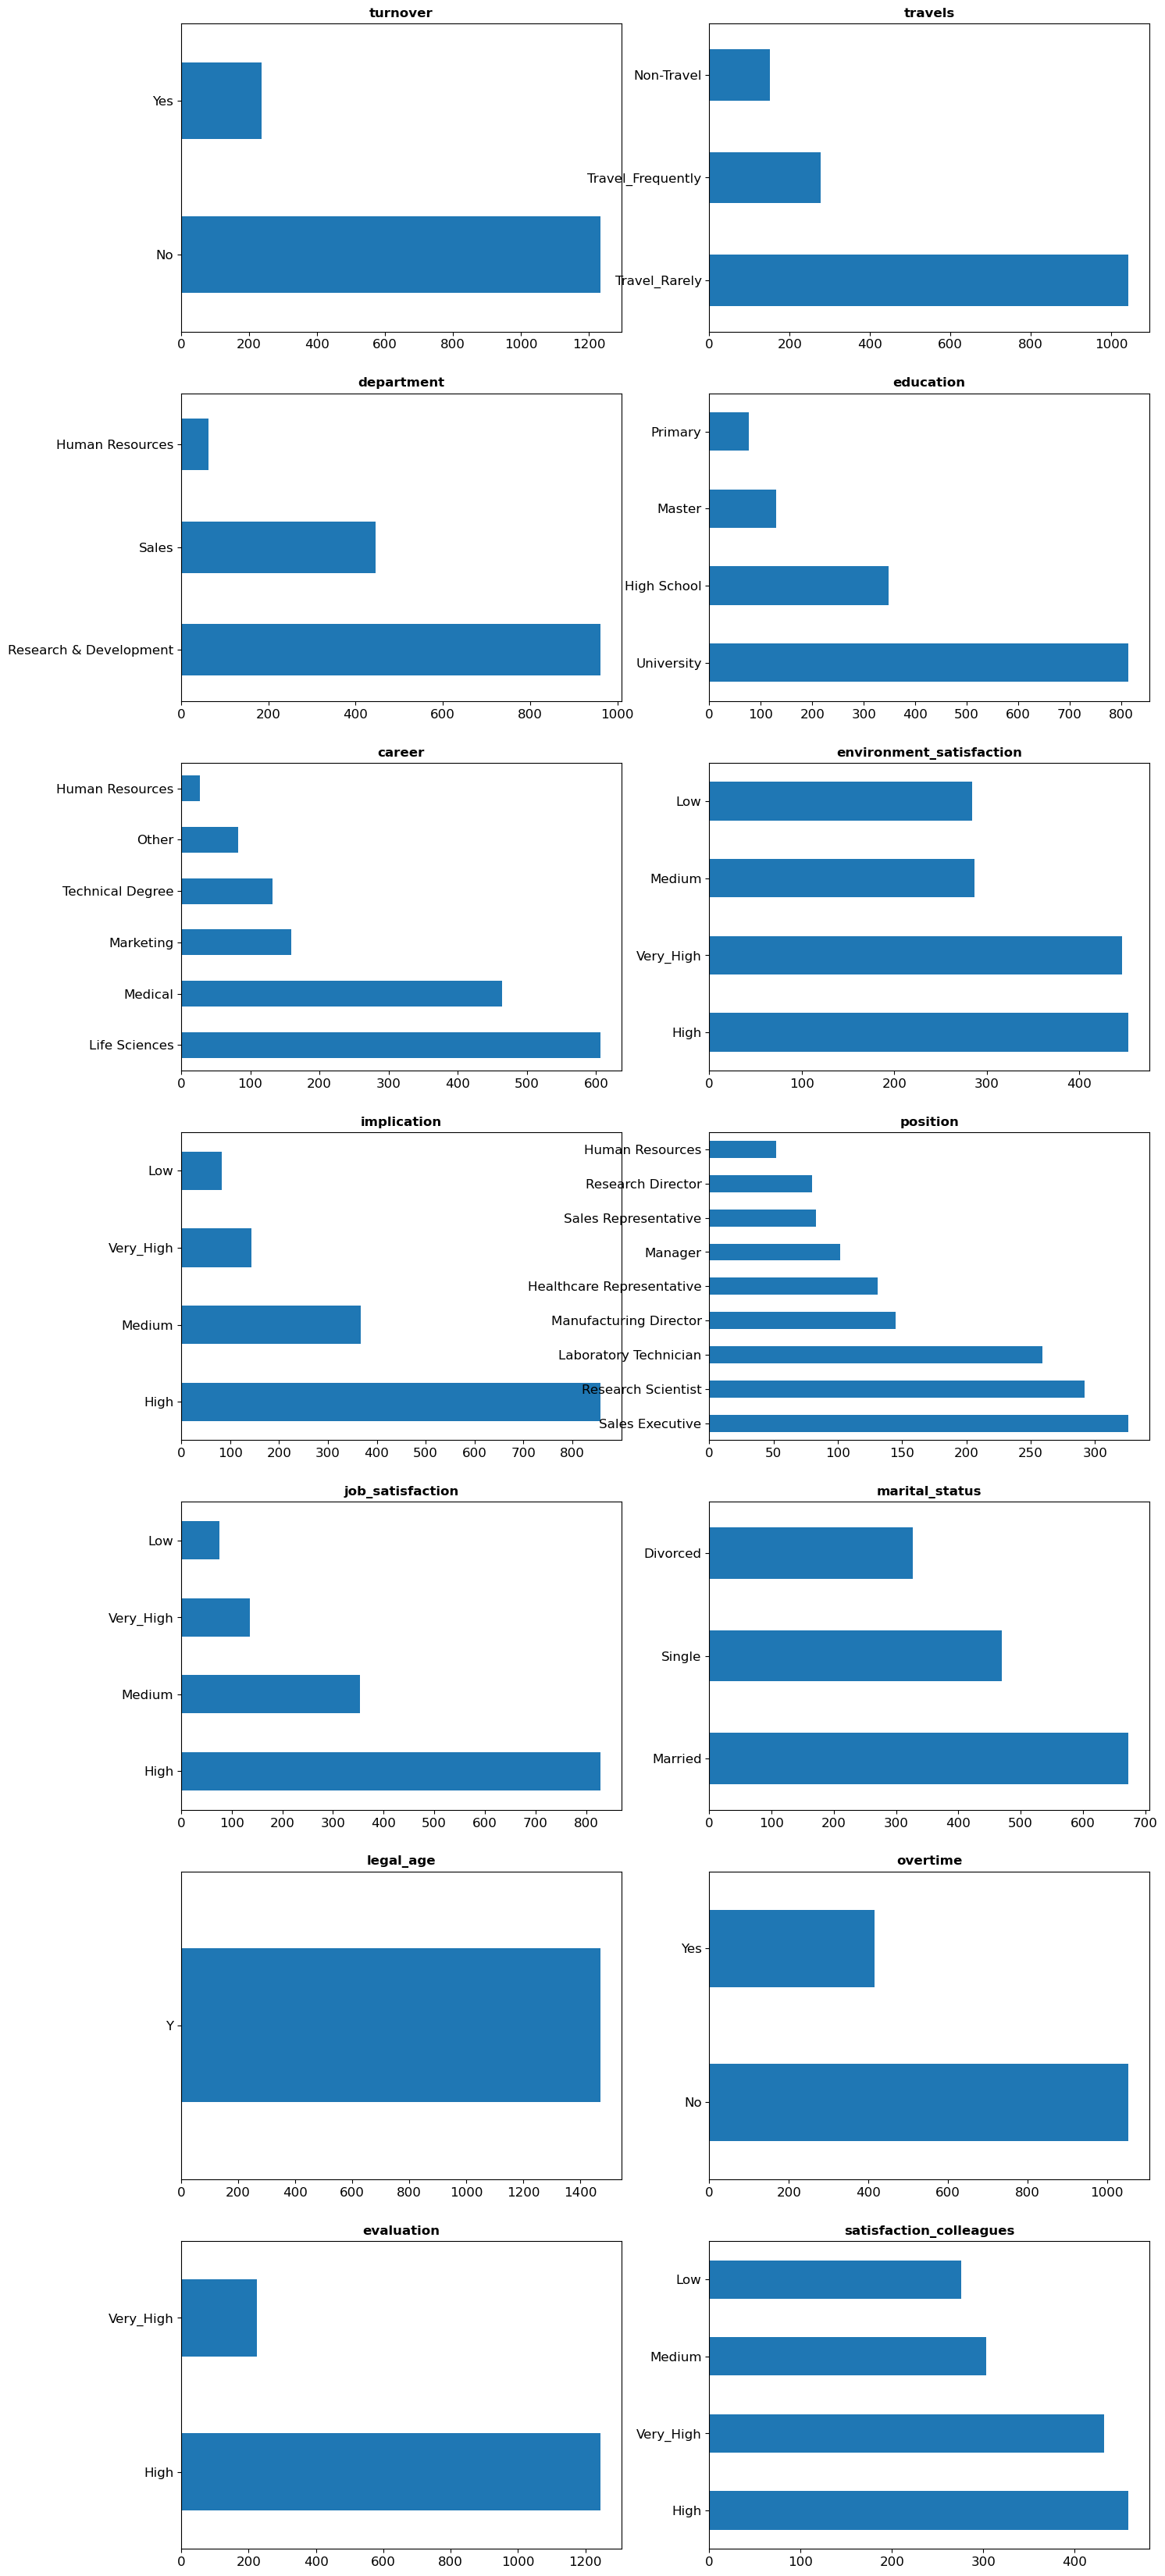

In [94]:
categoric_eda_graphs(df.select_dtypes('O'))

Conclusions:
* legal_age has just one value, we need to remove it
* Some categoric variables that have a few null values can be filled by the most common value, this give us:
    * education could be input with "University"
    * job_satisfaction could be input with "High"
    * implication could be input with "High"

In [95]:
df.drop(columns = 'legal_age', inplace = True)

df['education'] = df['education'].fillna('University')

df['job_satisfaction'] = df['job_satisfaction'].fillna('High')

df['implication'] = df['implication'].fillna('High')
df

,age,turnover,travels,department,distance_home,education,career,employees,environment_satisfaction,sex,...,salary_increase_perc,evaluation,satisfaction_colleagues,fortnight_hours,shares_level,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,1,Medium,3.0,...,11,High,Low,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,High School,Life Sciences,1,High,2.0,...,23,Very_High,Very_High,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High School,Other,1,Very_High,2.0,...,15,High,Medium,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,1,Very_High,3.0,...,11,High,High,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,1,Low,3.0,...,12,High,Very_High,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,High,4.0,...,17,High,High,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High School,Medical,1,Very_High,2.0,...,15,High,Low,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Medium,4.0,...,20,Very_High,Medium,80,1,6,0,6,0,3


### EDA Numeric Variables

In [96]:
def estadistics_cont(num):
    # describe
    estadistics = num.describe().T
    # Adding median
    estadistics['median'] = num.median()
    # We rearrange the columns so that the median is next to the mean
    estadistics = estadistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    # return
    return(estadistics)

In [97]:
estadistics_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
age,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distance_home,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
employees,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sex,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
work_level,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
month_salary,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_previous_companies,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
salary_increase_perc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
fortnight_hours,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
shares_level,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusions:
* employees has just one value, we need to remove it
* sex has just four values, we need to remove it
* fortnight_hours has just one value, we need to remove it

In [98]:
df.drop(columns = ['employees','sex','fortnight_hours'], inplace = True)
df

,age,turnover,travels,department,distance_home,education,career,environment_satisfaction,implication,work_level,...,overtime,salary_increase_perc,evaluation,satisfaction_colleagues,shares_level,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,Medium,High,2,...,Yes,11,High,Low,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,High School,Life Sciences,High,Medium,2,...,No,23,Very_High,Very_High,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High School,Other,Very_High,Medium,1,...,Yes,15,High,Medium,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,Very_High,High,1,...,Yes,11,High,High,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,No,12,High,Very_High,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,High,Very_High,2,...,No,17,High,High,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High School,Medical,Very_High,Medium,3,...,No,15,High,Low,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Medium,Very_High,2,...,Yes,20,Very_High,Medium,1,6,0,6,0,3


### Turnover rate

In [99]:
df.turnover.value_counts(normalize = True) * 100

No     83.877551
Yes    16.122449
Name: turnover, dtype: float64

In [100]:
# Transform turnover values into numeric ones
df['turnover'] = df.turnover.map({'No':0, 'Yes':1})
df

,age,turnover,travels,department,distance_home,education,career,environment_satisfaction,implication,work_level,...,overtime,salary_increase_perc,evaluation,satisfaction_colleagues,shares_level,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,University,Life Sciences,Medium,High,2,...,Yes,11,High,Low,0,8,0,6,0,5
2,49,0,Travel_Frequently,Research & Development,8,High School,Life Sciences,High,Medium,2,...,No,23,Very_High,Very_High,1,10,3,10,1,7
4,37,1,Travel_Rarely,Research & Development,2,High School,Other,Very_High,Medium,1,...,Yes,15,High,Medium,0,7,3,0,0,0
5,33,0,Travel_Frequently,Research & Development,3,University,Life Sciences,Very_High,High,1,...,Yes,11,High,High,0,8,3,8,3,0
7,27,0,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,No,12,High,Very_High,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,High,Very_High,2,...,No,17,High,High,1,17,3,5,0,3
2062,39,0,Travel_Rarely,Research & Development,6,High School,Medical,Very_High,Medium,3,...,No,15,High,Low,1,9,5,7,1,7
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Medium,Very_High,2,...,Yes,20,Very_High,Medium,1,6,0,6,0,3


### Is there a typical profile of an employee who leaves the company?

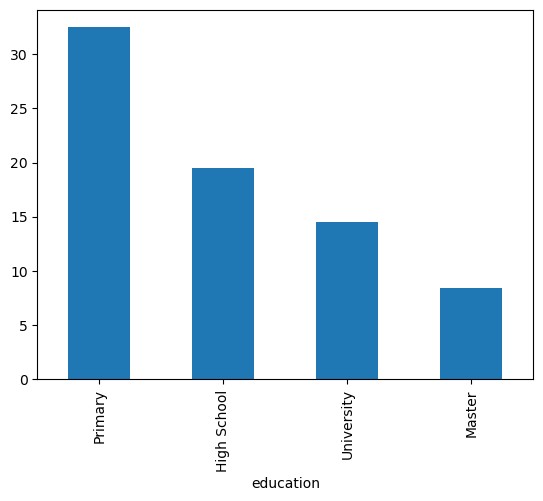

In [101]:
# Analysis by Education
temp = df.groupby('education').turnover.mean().sort_values(ascending = False) * 100
temp.plot.bar();

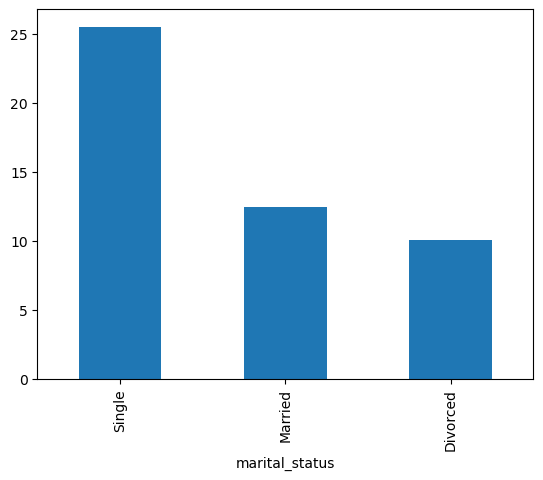

In [102]:
# Analysis by Marital Status
temp = df.groupby('marital_status').turnover.mean().sort_values(ascending = False) * 100
temp.plot.bar();

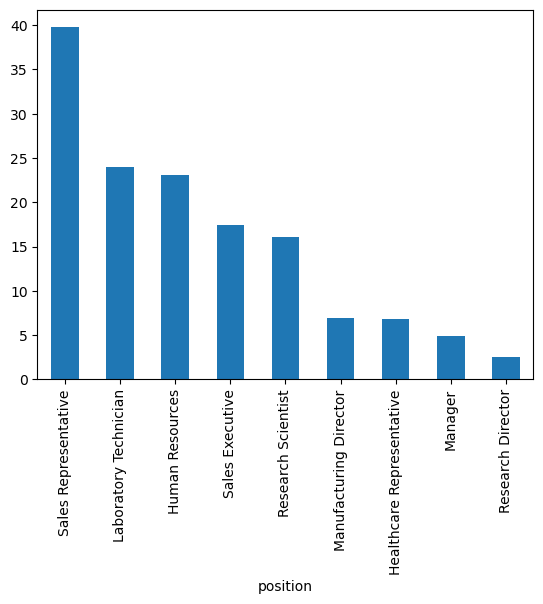

In [103]:
# Analysis by Position
temp = df.groupby('position').turnover.mean().sort_values(ascending = False) * 100
temp.plot.bar();

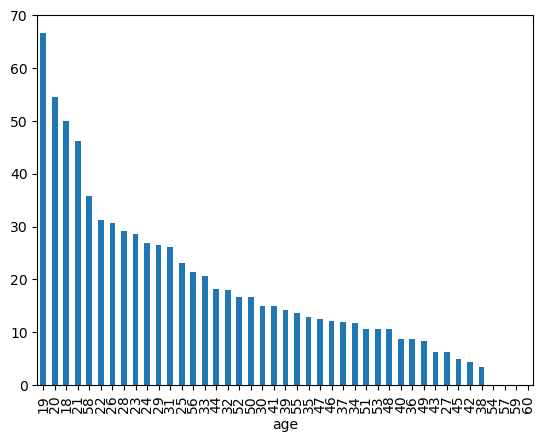

In [104]:
# Analysis by Age
temp = df.groupby('age').turnover.mean().sort_values(ascending = False) * 100
temp.plot.bar();

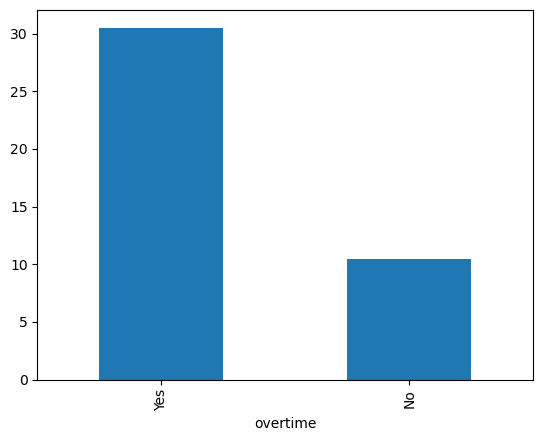

In [105]:
# Analysis by Overtime
temp = df.groupby('overtime').turnover.mean().sort_values(ascending = False) * 100
temp.plot.bar();

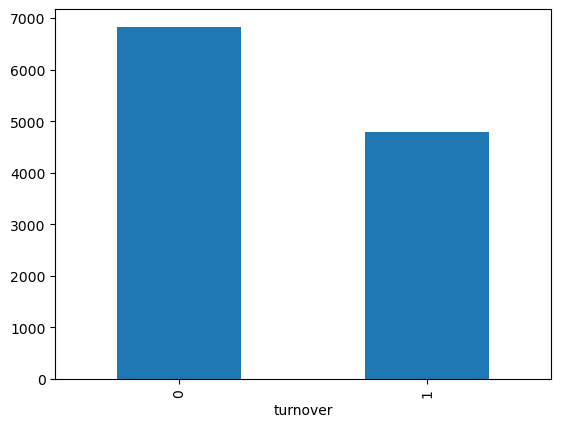

In [106]:
# Analysis by salary
temp = df.groupby('turnover').month_salary.mean()
temp.plot.bar();

Conclusions:
The average profile of the employee who leaves the company is:

* Low educational level
* Single
* Work as sales representative
* Low salary
* High overtime

### What is the economic impact of this problem?

#### According to the Center for American Progress' "Cost of Turnover" study ([Link to the website](https://www.americanprogress.org/article/there-are-significant-business-costs-to-replacing-employees/)):

* The turnover cost of employees who earn less than 30,000 is 16.1% of their salary

* The cost of turnover for employees who earn between 30,000-50,000 is 19.7% of their salary

* The cost of turnover for employees who earn between 50,000-75,000 is 20.4% of their salary

* The cost of turnover for employees who earn more than 75,000 is 21% of their salary

In [107]:
# adding annual_salary variable for each employee

df_annual = df.assign(annual_salary=df['month_salary'] * 12)[['month_salary', 'annual_salary']]
#df_annual[['month_salary', 'annual_salary']]

# Merging dataframes
merged_df = df.merge(df_annual, on='id', how='inner')

merged_df

,age,turnover,travels,department,distance_home,education,career,environment_satisfaction,implication,work_level,...,evaluation,satisfaction_colleagues,shares_level,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,month_salary_y,annual_salary
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,University,Life Sciences,Medium,High,2,...,High,Low,0,8,0,6,0,5,5993,71916
2,49,0,Travel_Frequently,Research & Development,8,High School,Life Sciences,High,Medium,2,...,Very_High,Very_High,1,10,3,10,1,7,5130,61560
4,37,1,Travel_Rarely,Research & Development,2,High School,Other,Very_High,Medium,1,...,High,Medium,0,7,3,0,0,0,2090,25080
5,33,0,Travel_Frequently,Research & Development,3,University,Life Sciences,Very_High,High,1,...,High,High,0,8,3,8,3,0,2909,34908
7,27,0,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,High,Very_High,1,6,3,2,2,2,3468,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,High,Very_High,2,...,High,High,1,17,3,5,0,3,2571,30852
2062,39,0,Travel_Rarely,Research & Development,6,High School,Medical,Very_High,Medium,3,...,High,Low,1,9,5,7,1,7,9991,119892
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Medium,Very_High,2,...,Very_High,Medium,1,6,0,6,0,3,6142,73704


#### Economic impact calculation for each employee who resigns

In [108]:
# Conditions function based on "Cost of Turnover" study

def cost_calc(annual_salary):
    if annual_salary <= 30000:
        return annual_salary * 0.161
    elif 30000 < annual_salary <= 50000:
        return annual_salary * 0.197
    elif 50000 < annual_salary <= 75000:
        return annual_salary * 0.204
    else:
        return annual_salary * 0.21

merged_df['turnover_cost'] = df_annual['annual_salary'].apply(cost_calc)
merged_df


,age,turnover,travels,department,distance_home,education,career,environment_satisfaction,implication,work_level,...,satisfaction_colleagues,shares_level,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,month_salary_y,annual_salary,turnover_cost
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,University,Life Sciences,Medium,High,2,...,Low,0,8,0,6,0,5,5993,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,High School,Life Sciences,High,Medium,2,...,Very_High,1,10,3,10,1,7,5130,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,High School,Other,Very_High,Medium,1,...,Medium,0,7,3,0,0,0,2090,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,University,Life Sciences,Very_High,High,1,...,High,0,8,3,8,3,0,2909,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,Very_High,1,6,3,2,2,2,3468,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,High,Very_High,2,...,High,1,17,3,5,0,3,2571,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,High School,Medical,Very_High,Medium,3,...,Low,1,9,5,7,1,7,9991,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Medium,Very_High,2,...,Medium,1,6,0,6,0,3,6142,73704,15035.616


### What has been the cost of this problem in the last year?

In [109]:
total_cost =  merged_df.loc[merged_df.turnover == 1].turnover_cost.sum()
print(f"Total cost in one year has been ${total_cost}")

Total cost in one year has been $2719005.912


In [110]:
# Transform annual salary values to plot versus turnover
merged_df['salary_category'] = merged_df['annual_salary'].apply(lambda x: 'Low' if x <= 30000 else ('Medium' if 30001 <= x <= 50000 else 'High'))
merged_df

,age,turnover,travels,department,distance_home,education,career,environment_satisfaction,implication,work_level,...,shares_level,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,month_salary_y,annual_salary,turnover_cost,salary_category
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,University,Life Sciences,Medium,High,2,...,0,8,0,6,0,5,5993,71916,14670.864,High
2,49,0,Travel_Frequently,Research & Development,8,High School,Life Sciences,High,Medium,2,...,1,10,3,10,1,7,5130,61560,12558.240,High
4,37,1,Travel_Rarely,Research & Development,2,High School,Other,Very_High,Medium,1,...,0,7,3,0,0,0,2090,25080,4037.880,Low
5,33,0,Travel_Frequently,Research & Development,3,University,Life Sciences,Very_High,High,1,...,0,8,3,8,3,0,2909,34908,6876.876,Medium
7,27,0,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,1,6,3,2,2,2,3468,41616,8198.352,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,High,Very_High,2,...,1,17,3,5,0,3,2571,30852,6077.844,Medium
2062,39,0,Travel_Rarely,Research & Development,6,High School,Medical,Very_High,Medium,3,...,1,9,5,7,1,7,9991,119892,25177.320,High
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Medium,Very_High,2,...,1,6,0,6,0,3,6142,73704,15035.616,High


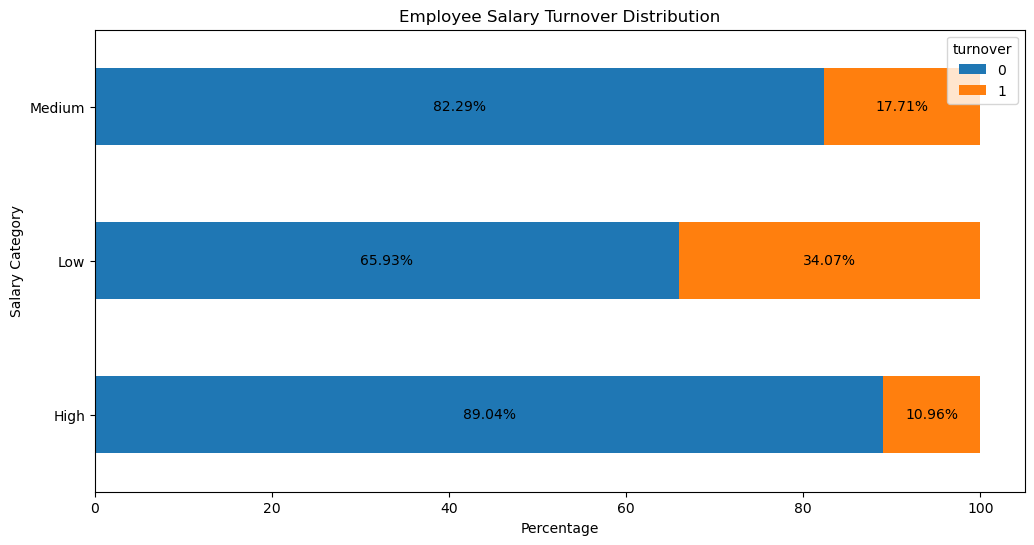

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your DataFrame with the 'salary_category' column
f, ax = plt.subplots(figsize=(12, 6))

# Calculate counts for each salary category and turnover
category_counts = merged_df.groupby(['salary_category', 'turnover']).size().unstack()

# Calculate percentages
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

# Plot the horizontal stacked bar plot
category_percentages.plot(kind='barh', stacked=True, ax=ax)

# Add percentage annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.2f}%', (x + width / 2, y + height / 2), va='center', ha='center')

# Set labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Salary Category')
ax.set_title('Employee Salary Turnover Distribution')

plt.show()



## 6. Model Selection

### Data Preparation for Modeling
#### We are preparing the data and building a machine learning model using a Decision Tree Classifier

#### First by transforming all categorical variables into numeric using a data preprocessing technique. Converting categorical variables into a binary matrix representation, often referred to as one-hot encoding

In [112]:
df_ml = merged_df.copy()

In [113]:
from sklearn.preprocessing import OneHotEncoder

#Categoric variables
cat = df_ml.select_dtypes('O')

#Create an instance
ohe = OneHotEncoder(sparse_output = False)

#Training
ohe.fit(cat)

#Aply
cat_ohe = ohe.transform(cat)

#Named
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [114]:
cat_ohe

,travels_Non-Travel,travels_Travel_Frequently,travels_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_High School,education_Master,education_Primary,education_University,...,overtime_Yes,evaluation_High,evaluation_Very_High,satisfaction_colleagues_High,satisfaction_colleagues_Low,satisfaction_colleagues_Medium,satisfaction_colleagues_Very_High,salary_category_High,salary_category_Low,salary_category_Medium
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Final Dataframe

#### We select the numeric variables to be able to join them with the categoric ones (cat_hoe)

In [115]:
num = merged_df.select_dtypes('number').reset_index(drop = True)

#### We combine them all in the final dataframe

In [116]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,travels_Non-Travel,travels_Travel_Frequently,travels_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_High School,education_Master,education_Primary,education_University,...,salary_increase_perc,shares_level,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,month_salary_y,annual_salary,turnover_cost
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,11,0,8,0,6,0,5,5993,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,23,1,10,3,10,1,7,5130,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,15,0,7,3,0,0,0,2090,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,11,0,8,3,8,3,0,2909,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,12,1,6,3,2,2,2,3468,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,17,1,17,3,5,0,3,2571,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,15,1,9,5,7,1,7,9991,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,20,1,6,0,6,0,3,6142,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,14,0,17,3,9,0,8,5390,64680,13194.720


### Modeling Design

#### We are preparing our data by separating predictors and target, splitting it into training and testing sets, and then creating and training a Decision Tree Classifier on the training data.

#### Separation of predictors and target

In [117]:
x = df_ml.drop(columns='turnover')
y = df_ml['turnover']

#### The train_test_split function from scikit-learn is used to split the data into training and testing sets

In [118]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

#### Training of the model train

In [119]:
from sklearn.tree import DecisionTreeClassifier

#Instancing
ac = DecisionTreeClassifier(max_depth=4)

#Training
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

#### Prediction and validation on test

In [120]:
# Prediction
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.07758621, 0.60869565, 0.07758621, 0.07758621, 0.07758621,
       0.05154639, 0.60869565, 0.07758621, 0.07758621, 0.07758621,
       0.07758621, 0.07758621, 0.07758621, 0.60869565, 0.32727273,
       0.07758621, 0.07758621, 0.07758621, 0.07758621, 0.07758621])

In [121]:
# Evaluation
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.6837418889689978

#### Decision Tree Classifier

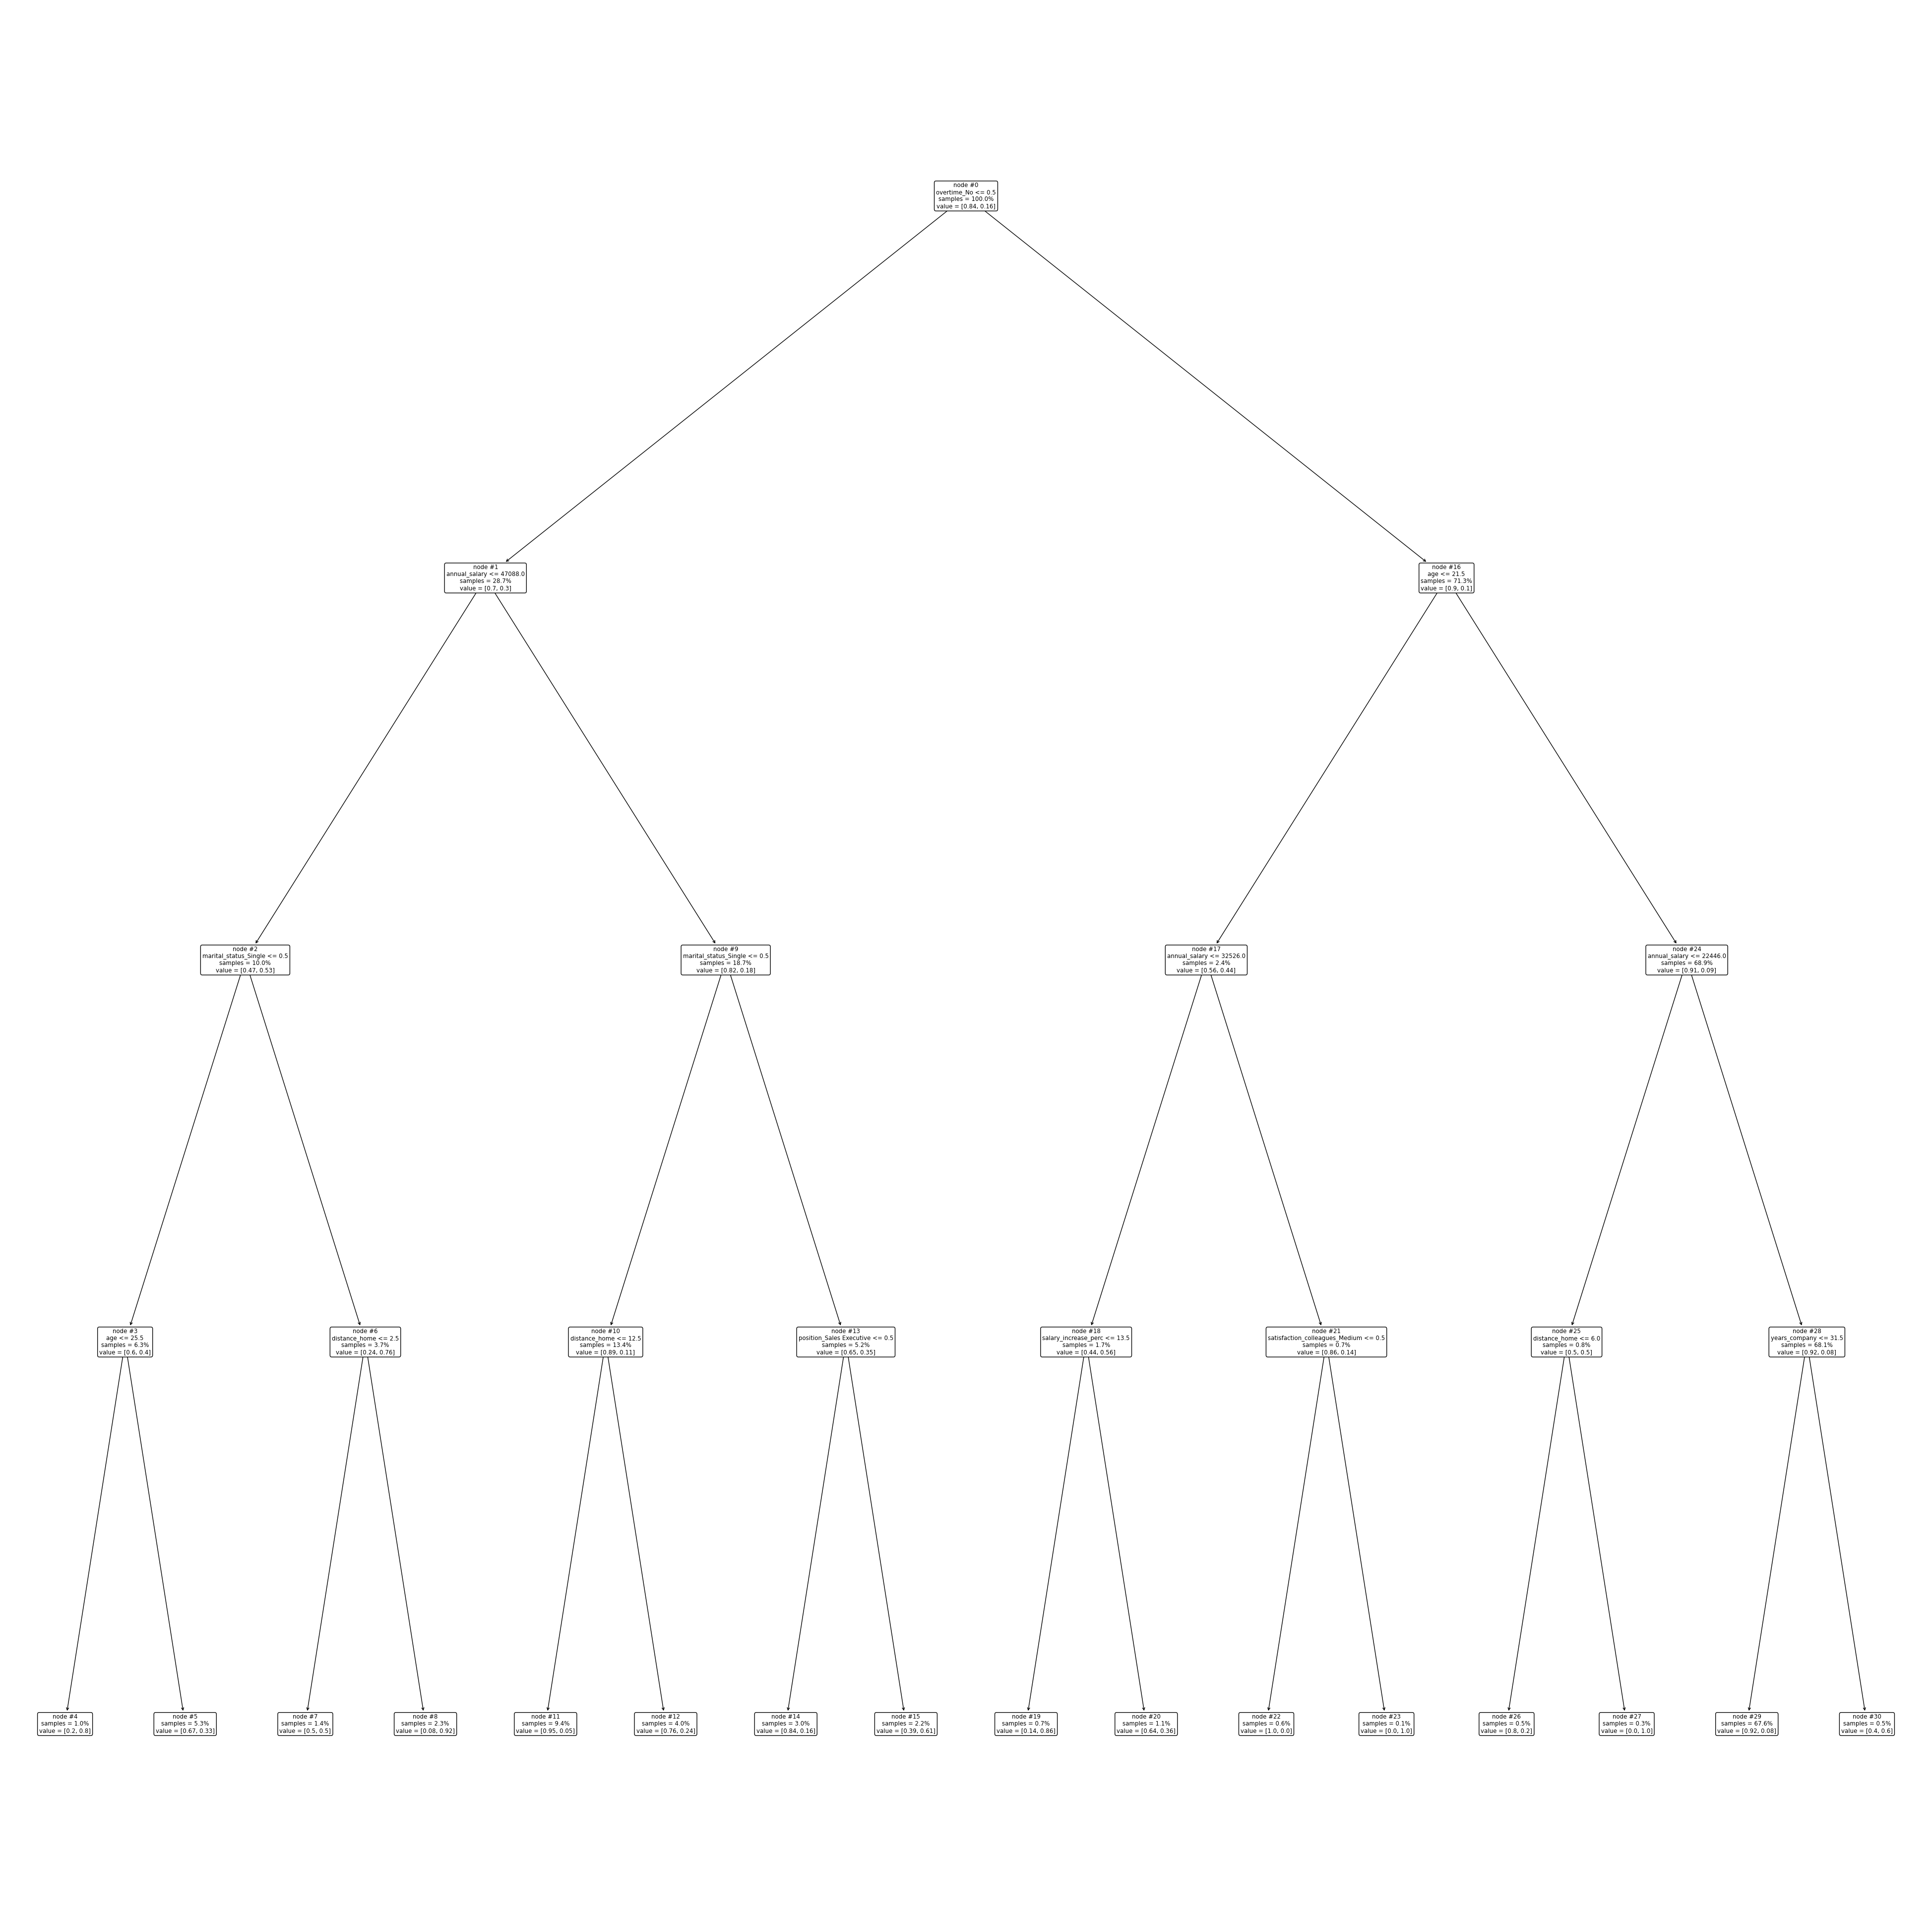

In [122]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

#### Main Variables

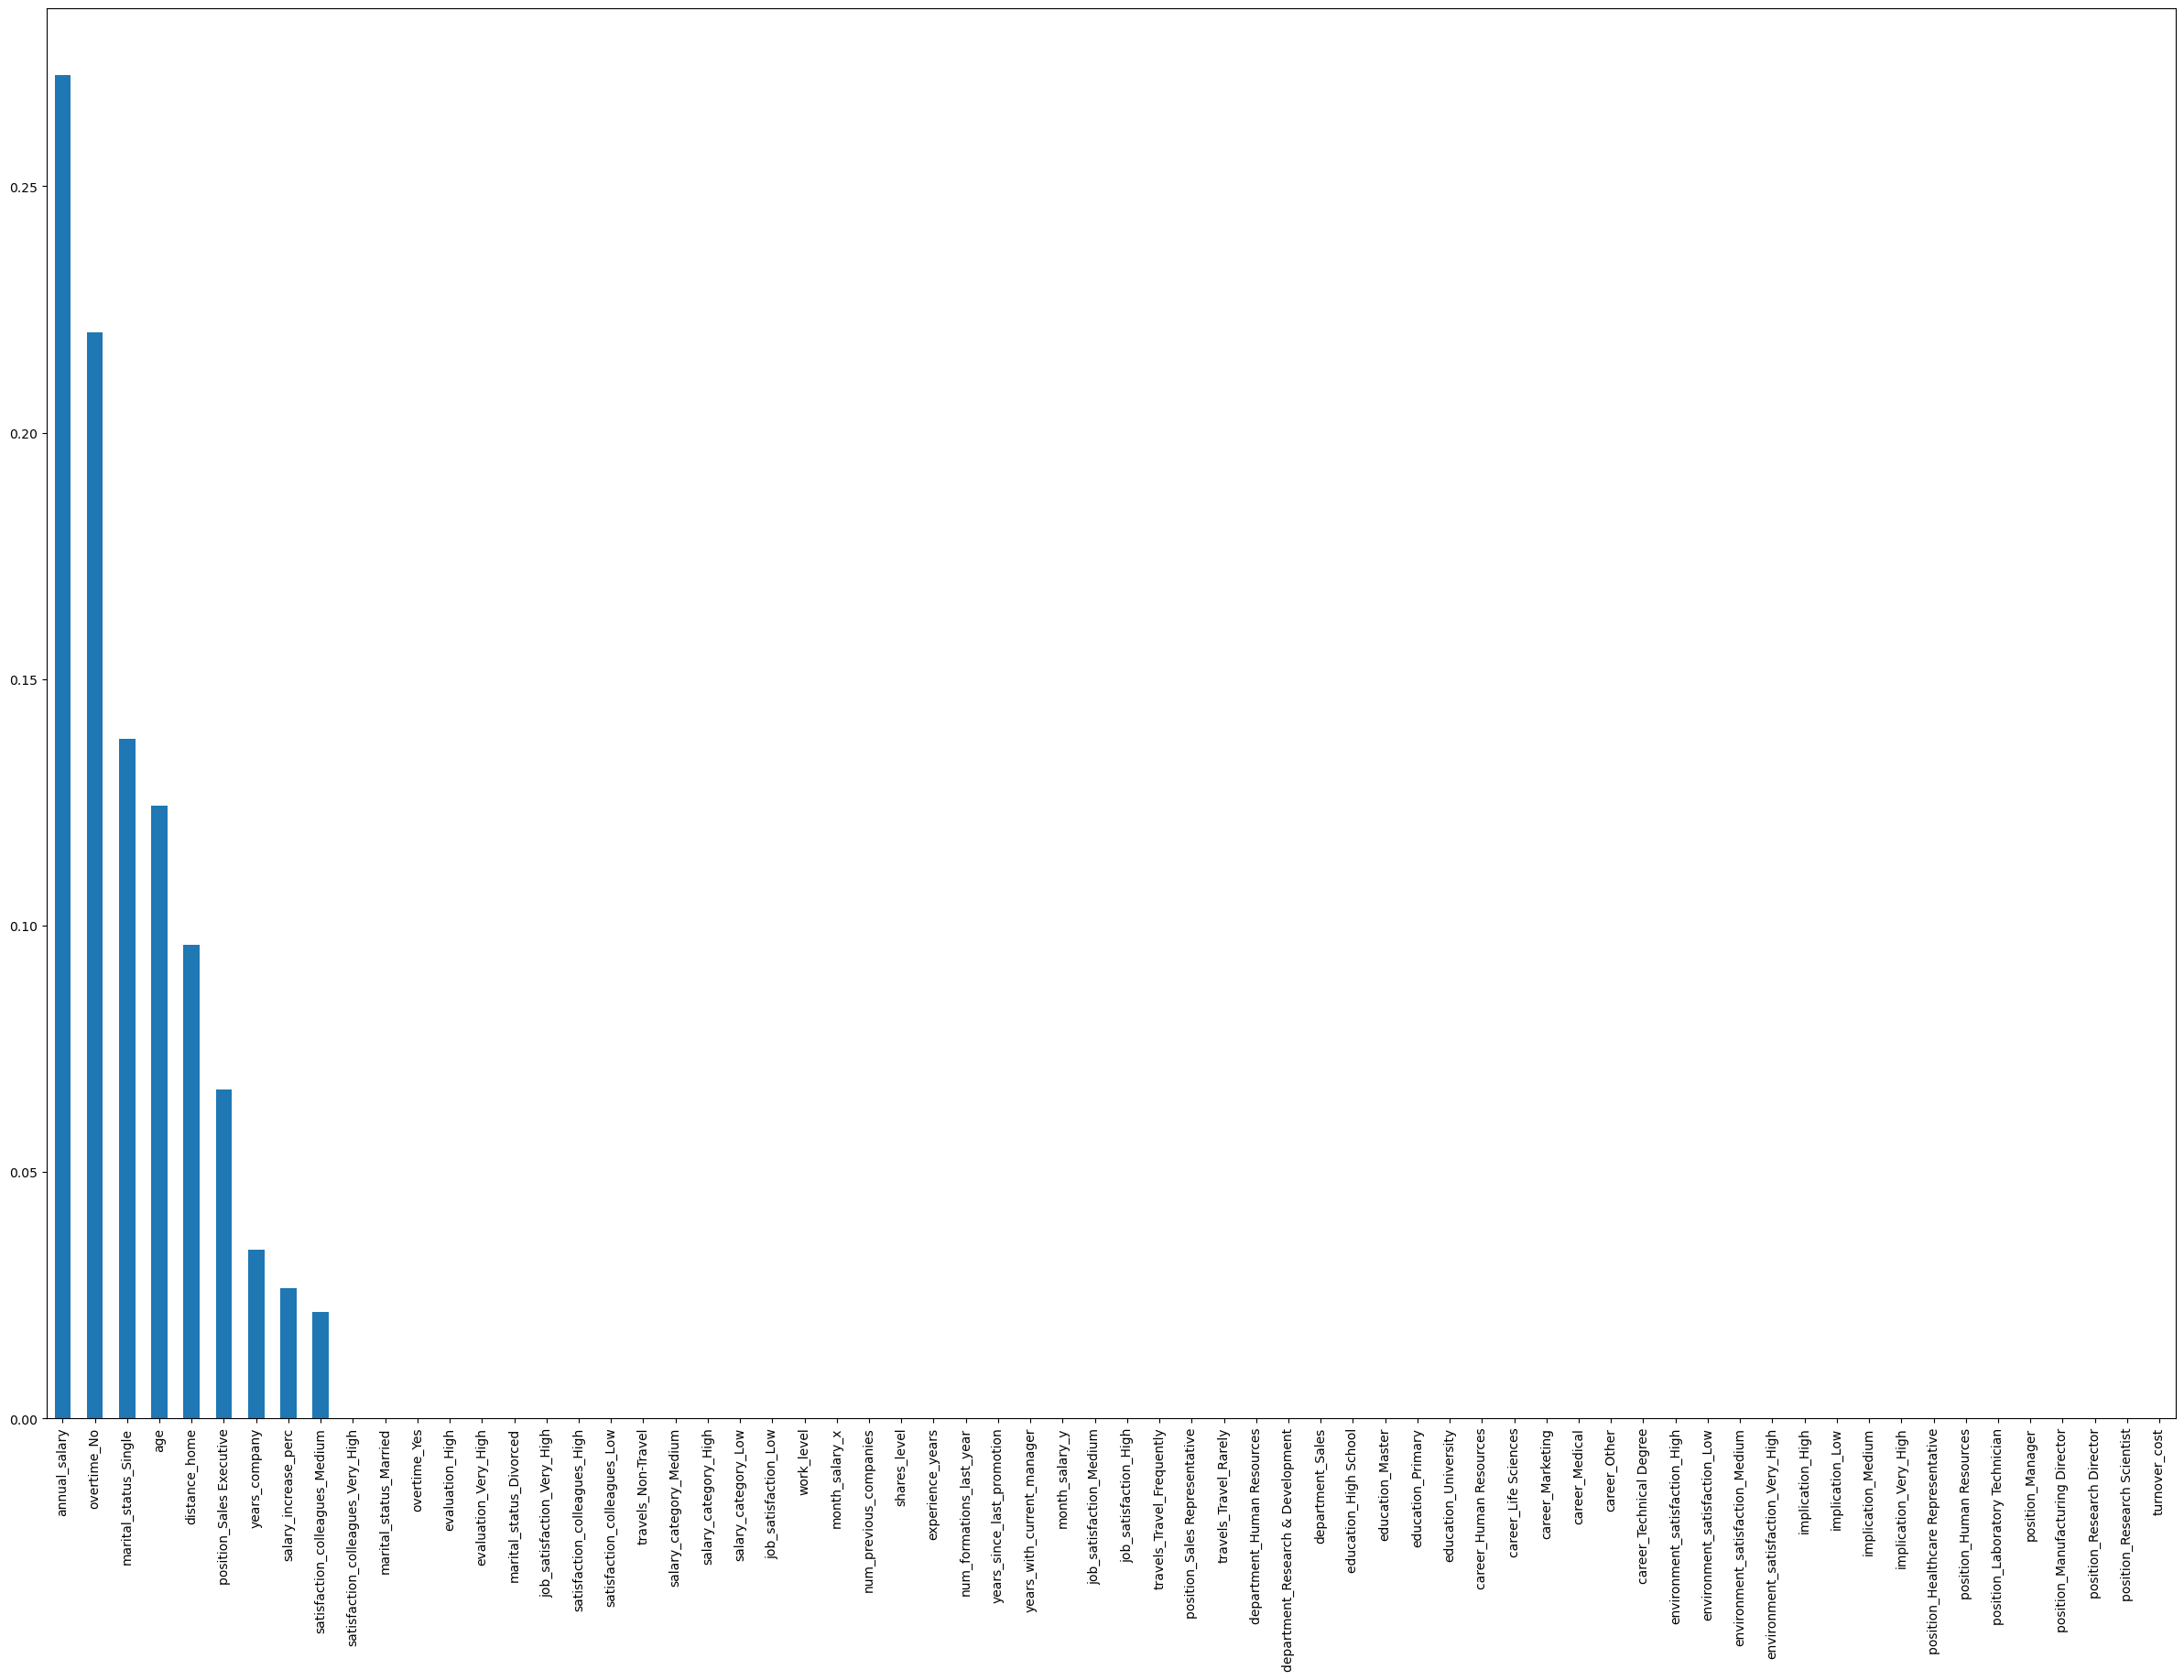

In [123]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

#### We create a new column (turnover_scoring) that shows the scoring of the main dataframe based on the prediction
#### The higher the value (close or equal to 1) the higher the probability of turnover

In [124]:
merged_df['turnover_scoring'] = ac.predict_proba(df_ml.drop(columns = 'turnover'))[:, 1]
merged_df

,age,turnover,travels,department,distance_home,education,career,environment_satisfaction,implication,work_level,...,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,month_salary_y,annual_salary,turnover_cost,salary_category,turnover_scoring
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,University,Life Sciences,Medium,High,2,...,8,0,6,0,5,5993,71916,14670.864,High,0.608696
2,49,0,Travel_Frequently,Research & Development,8,High School,Life Sciences,High,Medium,2,...,10,3,10,1,7,5130,61560,12558.240,High,0.077586
4,37,1,Travel_Rarely,Research & Development,2,High School,Other,Very_High,Medium,1,...,7,3,0,0,0,2090,25080,4037.880,Low,0.500000
5,33,0,Travel_Frequently,Research & Development,3,University,Life Sciences,Very_High,High,1,...,8,3,8,3,0,2909,34908,6876.876,Medium,0.327273
7,27,0,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,6,3,2,2,2,3468,41616,8198.352,Medium,0.077586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,High,Very_High,2,...,17,3,5,0,3,2571,30852,6077.844,Medium,0.077586
2062,39,0,Travel_Rarely,Research & Development,6,High School,Medical,Very_High,Medium,3,...,9,5,7,1,7,9991,119892,25177.320,High,0.077586
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Medium,Very_High,2,...,6,0,6,0,3,6142,73704,15035.616,High,0.051546


### Conclusions

#### We can get top 10 employees with higher probability to leave the company

In [125]:
merged_df.sort_values(by = 'turnover_scoring', ascending = False)[0:10]

,age,turnover,travels,department,distance_home,education,career,environment_satisfaction,implication,work_level,...,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,month_salary_y,annual_salary,turnover_cost,salary_category,turnover_scoring
id,,,,,,,,,,,,,,,,,,,,,
1928,29,1,Travel_Frequently,Sales,24,University,Technical Degree,High,Very_High,1,...,1,3,1,0,0,1091,13092,2107.812,Low,1.000000
1482,30,0,Non-Travel,Research & Development,7,University,Technical Degree,High,High,1,...,1,2,1,0,0,1274,15288,2461.368,Low,1.000000
2023,23,1,Travel_Frequently,Sales,9,University,Marketing,Very_High,High,1,...,1,3,1,1,0,1790,21480,3458.280,Low,1.000000
1876,30,1,Travel_Rarely,Sales,9,University,Medical,Medium,High,1,...,1,3,1,0,0,1081,12972,2088.492,Low,1.000000
1433,31,1,Travel_Rarely,Research & Development,8,High School,Life Sciences,Low,Medium,1,...,1,3,1,0,0,1261,15132,2436.252,Low,1.000000
1714,24,1,Travel_Rarely,Human Resources,22,Primary,Human Resources,Very_High,Low,1,...,1,2,1,0,0,1555,18660,3004.260,Low,1.000000
1056,28,0,Travel_Rarely,Sales,10,University,Medical,Very_High,High,1,...,1,5,1,0,0,1052,12624,2032.464,Low,1.000000
960,20,1,Travel_Rarely,Research & Development,4,University,Technical Degree,Low,High,1,...,1,2,1,0,0,2973,35676,7028.172,Medium,1.000000
701,20,1,Travel_Rarely,Research & Development,10,University,Medical,Very_High,High,1,...,1,5,1,1,1,1009,12108,1949.388,Low,0.916667


#### We can plot the Risk of turnover by position

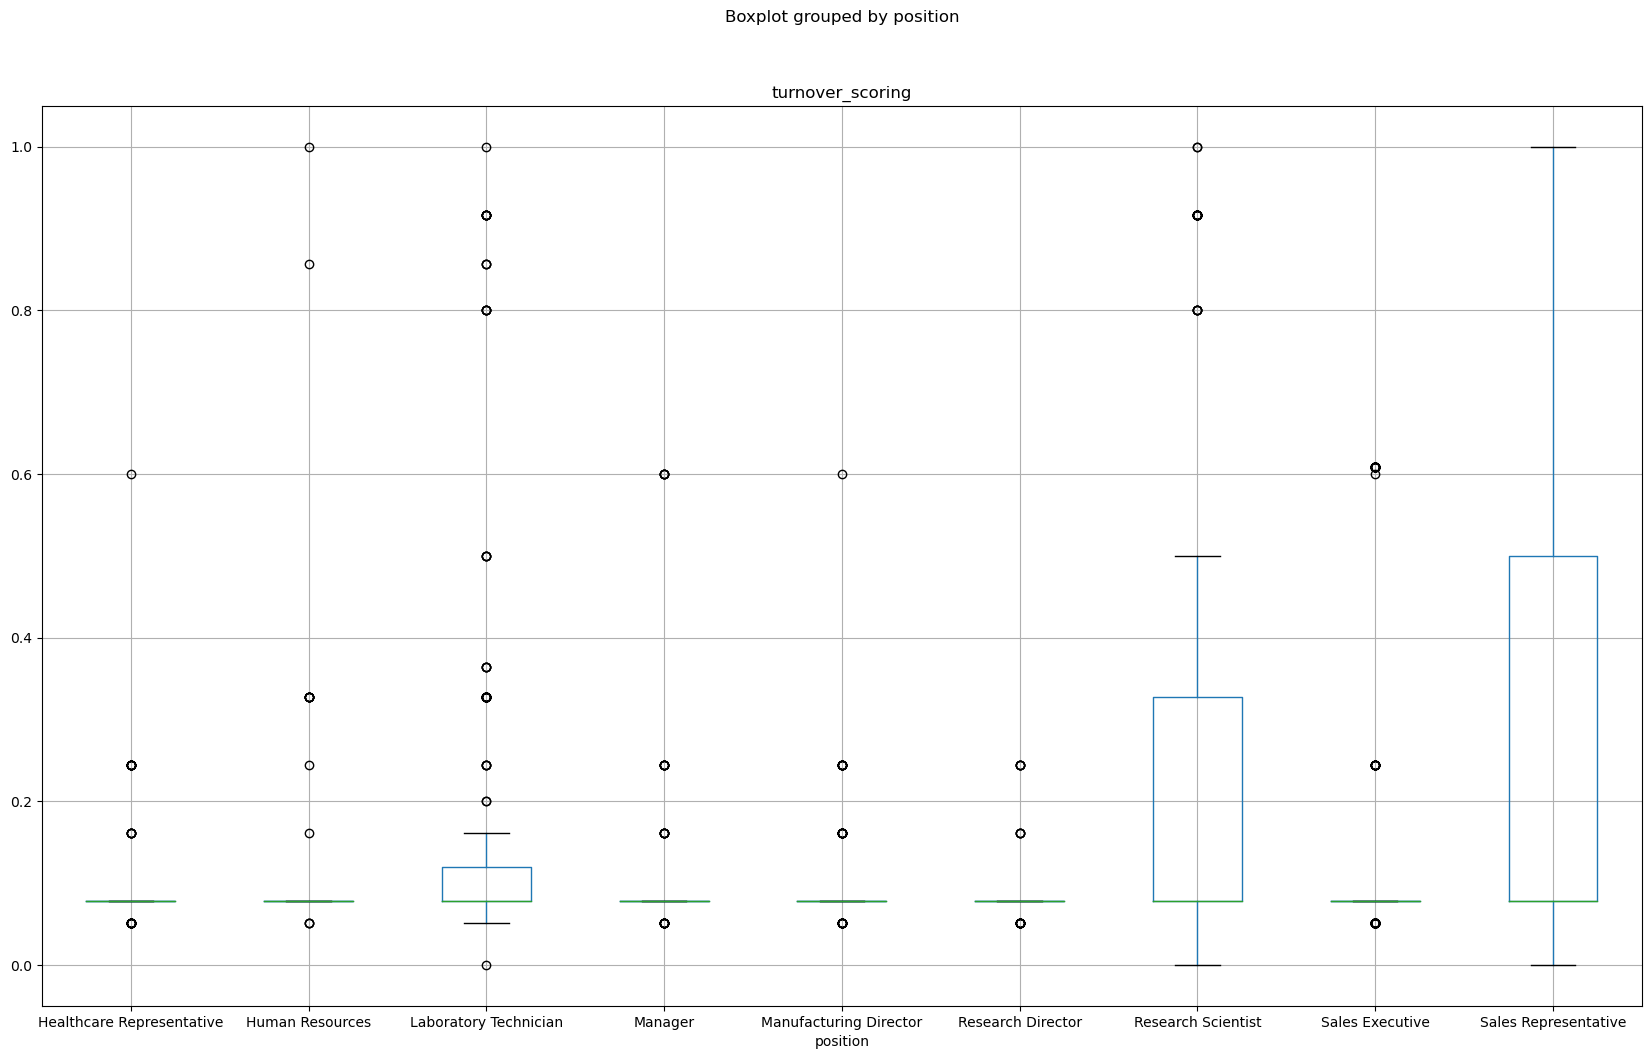

In [126]:
merged_df.boxplot(column='turnover_scoring', by='position', figsize = (20,12));

### Final dataframe results

In [127]:
merged_df

,age,turnover,travels,department,distance_home,education,career,environment_satisfaction,implication,work_level,...,experience_years,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager,month_salary_y,annual_salary,turnover_cost,salary_category,turnover_scoring
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,University,Life Sciences,Medium,High,2,...,8,0,6,0,5,5993,71916,14670.864,High,0.608696
2,49,0,Travel_Frequently,Research & Development,8,High School,Life Sciences,High,Medium,2,...,10,3,10,1,7,5130,61560,12558.240,High,0.077586
4,37,1,Travel_Rarely,Research & Development,2,High School,Other,Very_High,Medium,1,...,7,3,0,0,0,2090,25080,4037.880,Low,0.500000
5,33,0,Travel_Frequently,Research & Development,3,University,Life Sciences,Very_High,High,1,...,8,3,8,3,0,2909,34908,6876.876,Medium,0.327273
7,27,0,Travel_Rarely,Research & Development,2,University,Medical,Low,High,1,...,6,3,2,2,2,3468,41616,8198.352,Medium,0.077586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,High,Very_High,2,...,17,3,5,0,3,2571,30852,6077.844,Medium,0.077586
2062,39,0,Travel_Rarely,Research & Development,6,High School,Medical,Very_High,Medium,3,...,9,5,7,1,7,9991,119892,25177.320,High,0.077586
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Medium,Very_High,2,...,6,0,6,0,3,6142,73704,15035.616,High,0.051546


In [128]:
# pip install openpyxl

#### Exporting to Excel for visalisation

In [129]:

# Specify the Excel file path
excel_file_path = 'turnover_scoring.xlsx'

# Export the DataFrame to Excel
merged_df.to_excel(excel_file_path, index=False)